## About Dataset

# Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

# Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- kinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
# visualisation
!pip install termcolor
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt

import cufflinks as cf
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from pylab import rcParams
# Scikitlearn Library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
# Remove Warnings and Better Observation
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 600)
constraints = ['#581845', '#C70039']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## LOAD AND CHECK DATA

In [3]:
df_ = pd.read_csv("/content/diabetes.csv")
df = df_.copy()

In [ ]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" HEAD ".center(70, '*'))
    print("\n",df.head(head),"\n")
    print(' TAIL '.center(70, '*'))
    print("\n",df.tail(tail),"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" QUANTILES ".center(70, '*'))
    print("\n",df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T,"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())

check_df(df)

******************************* SHAPE ********************************
Observations -------> 768
Features     -------> 9
Shape of dataset: (768, 9)
************************* TYPES OF FEATURES **************************
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object 

******************************** HEAD ********************************

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.60000                   0.62700   50        1
1            1       85             66             29        0 26.60000                   0.35100   31        0
2            8      183         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00000,3.84505,3.36958,0.00000,1.00000,3.00000,6.00000,17.00000
Glucose,768.00000,120.89453,31.97262,0.00000,99.00000,117.00000,140.25000,199.00000
BloodPressure,768.00000,69.10547,19.35581,0.00000,62.00000,72.00000,80.00000,122.00000
SkinThickness,768.00000,20.53646,15.95222,0.00000,0.00000,23.00000,32.00000,99.00000
Insulin,768.00000,79.79948,115.24400,0.00000,0.00000,30.50000,127.25000,846.00000
BMI,768.00000,31.99258,7.88416,0.00000,27.30000,32.00000,36.60000,67.10000
DiabetesPedigreeFunction,768.00000,0.47188,0.33133,0.07800,0.24375,0.37250,0.62625,2.42000
Age,768.00000,33.24089,11.76023,21.00000,24.00000,29.00000,41.00000,81.00000
Outcome,768.00000,0.34896,0.47695,0.00000,0.00000,0.00000,1.00000,1.00000


In [ ]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
DiabetesPedigreeFunction,517
BMI,248
Insulin,186
Glucose,136
Age,52
SkinThickness,51
BloodPressure,47
Pregnancies,17
Outcome,2


In [ ]:
# We can see value-counts of all columns in percent
dict = {}
for i in list(df.columns):
  dict[i] = df[i].value_counts(normalize=True).sort_values(ascending=False).head(5).round(2)

print(dict)

{'Pregnancies': 1   0.18000
0   0.14000
2   0.13000
3   0.10000
4   0.09000
Name: Pregnancies, dtype: float64, 'Glucose': 99    0.02000
100   0.02000
111   0.02000
129   0.02000
125   0.02000
Name: Glucose, dtype: float64, 'BloodPressure': 70   0.07000
74   0.07000
78   0.06000
68   0.06000
72   0.06000
Name: BloodPressure, dtype: float64, 'SkinThickness': 0    0.30000
32   0.04000
30   0.04000
27   0.03000
23   0.03000
Name: SkinThickness, dtype: float64, 'Insulin': 0     0.49000
105   0.01000
130   0.01000
140   0.01000
120   0.01000
Name: Insulin, dtype: float64, 'BMI': 32.00000   0.02000
31.20000   0.02000
31.60000   0.02000
0.00000    0.01000
32.40000   0.01000
Name: BMI, dtype: float64, 'DiabetesPedigreeFunction': 0.25800   0.01000
0.25400   0.01000
0.26800   0.01000
0.20700   0.01000
0.26100   0.01000
Name: DiabetesPedigreeFunction, dtype: float64, 'Age': 22   0.09000
21   0.08000
25   0.06000
24   0.06000
23   0.05000
Name: Age, dtype: float64, 'Outcome': 0   0.65000
1   0.3500

**EXPLORATORY DATA ANALYSIS**

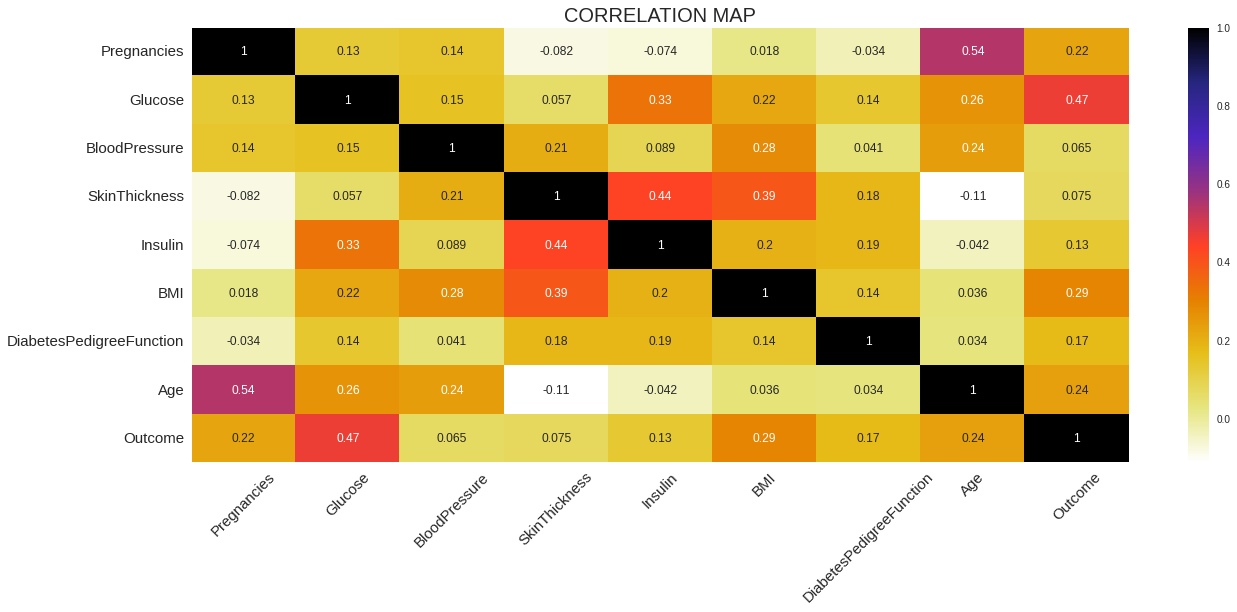

In [ ]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=45, size=15)
plt.yticks(rotation=0, size=15)
plt.title("CORRELATION MAP",size=20)
sns.heatmap(df.corr(), 
            annot=True, 
            cmap=plt.cm.CMRmap_r);
      
# we can see that outcome is more correlated with glucose(%47)

In [ ]:
df["Outcome"].corr(df["Glucose"])

0.46658139830687295

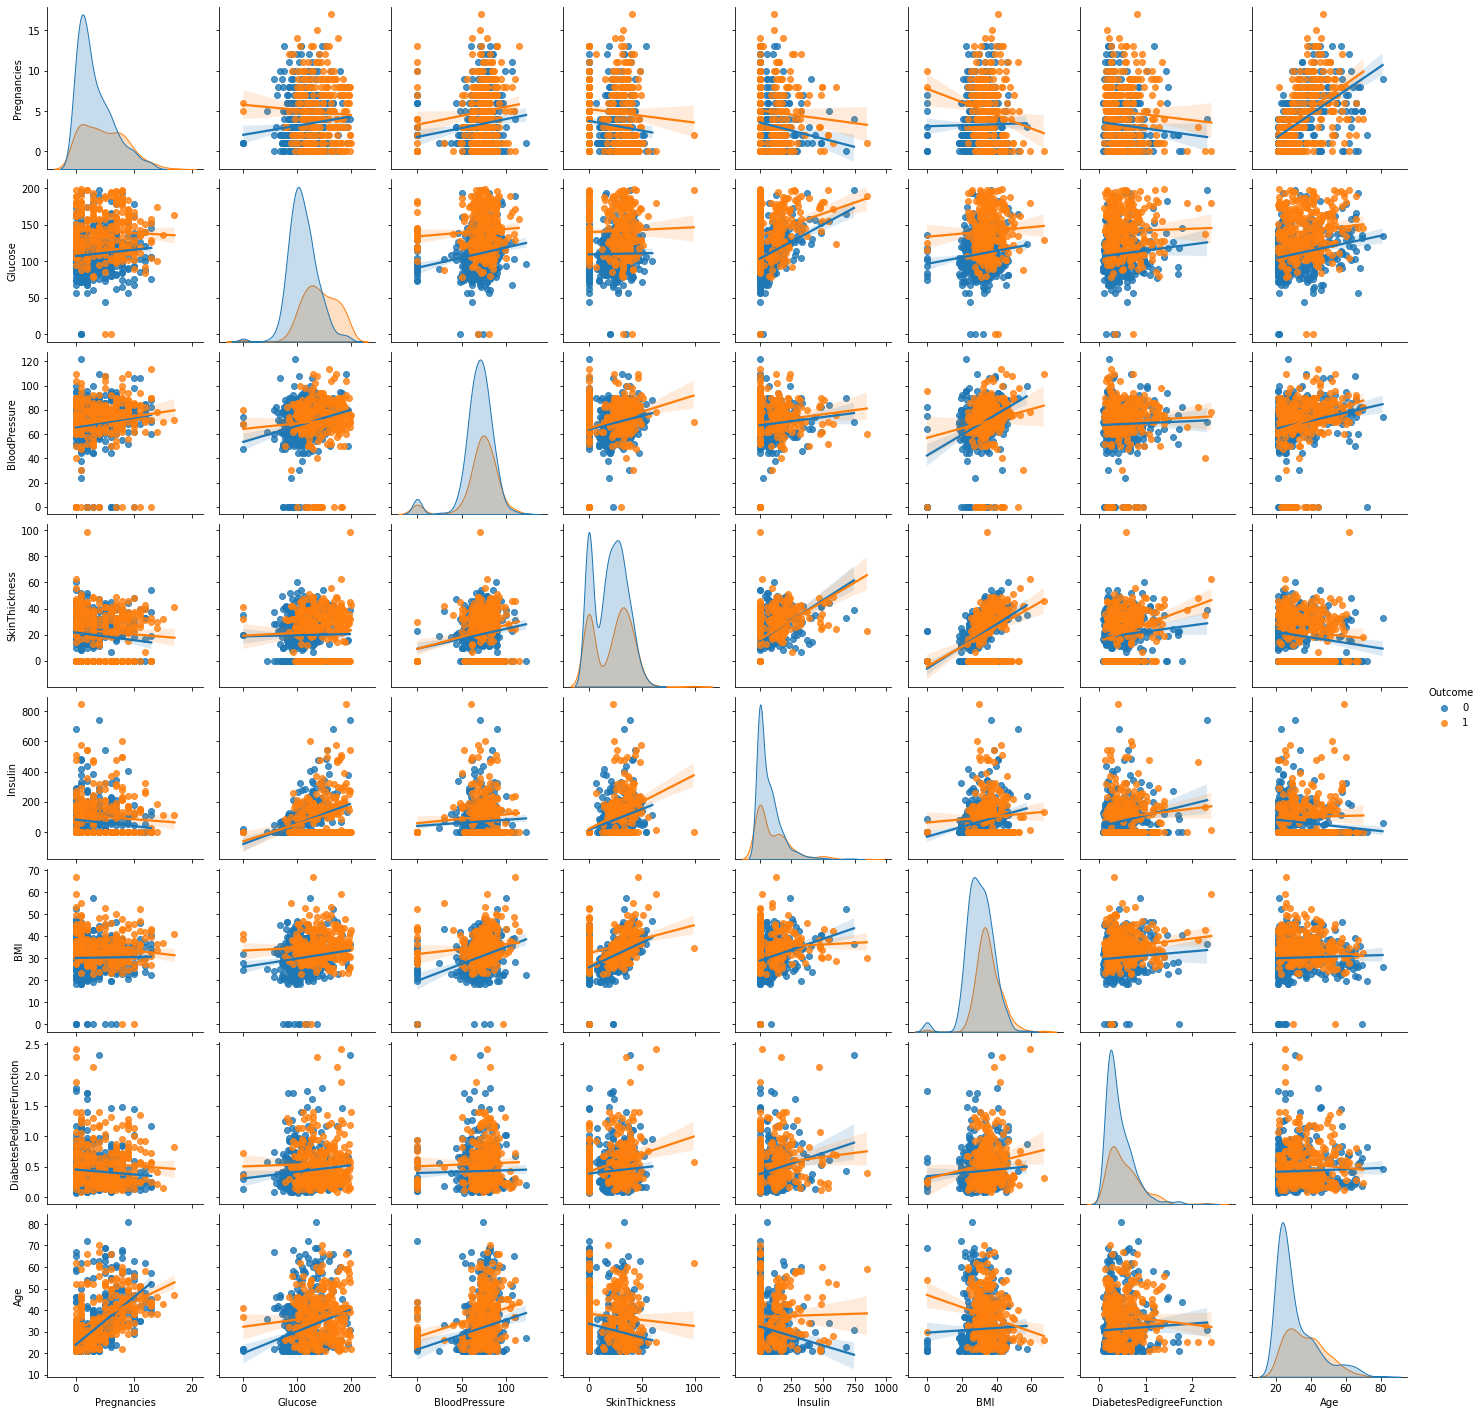

In [ ]:
sns.pairplot(df,
             hue="Outcome",
             kind="reg",
             corner = True);

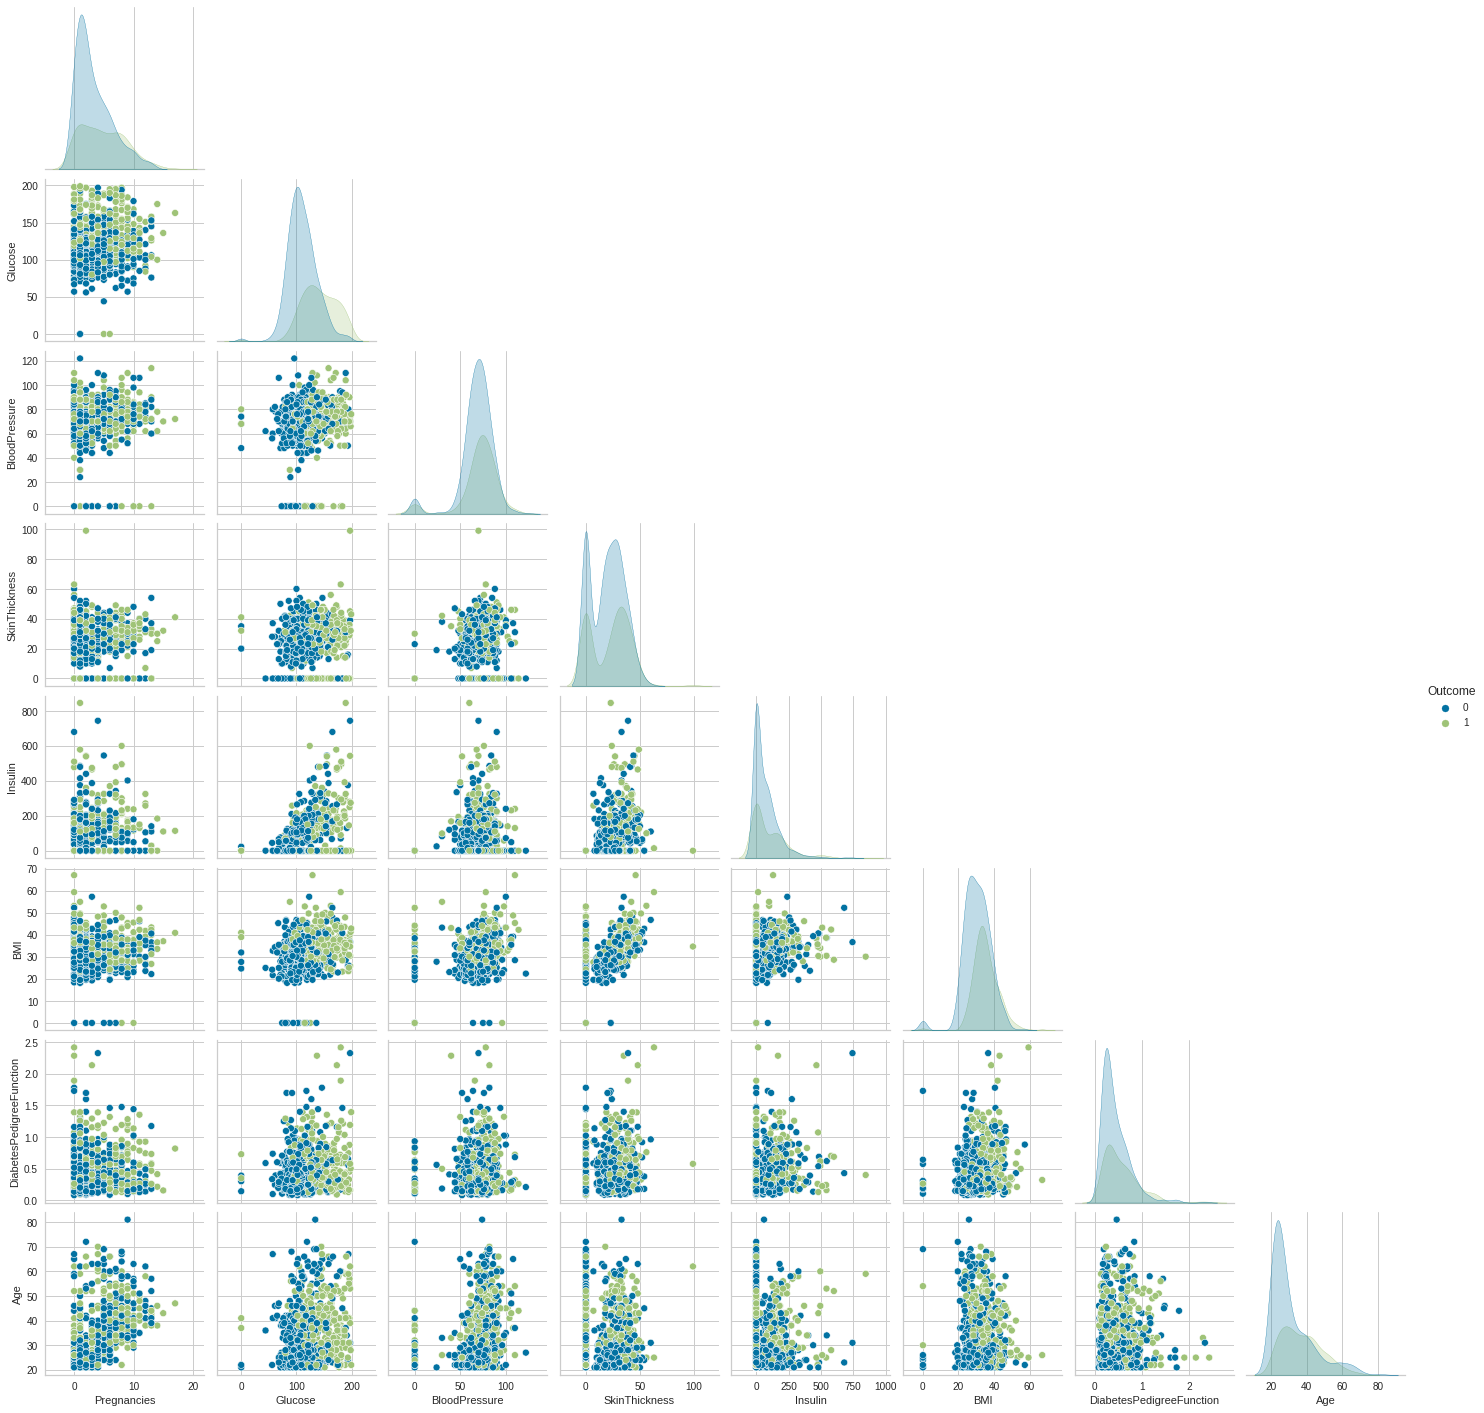

In [ ]:

sns.pairplot(df,
             hue='Outcome',
             corner = True, 
             kind = 'scatter');

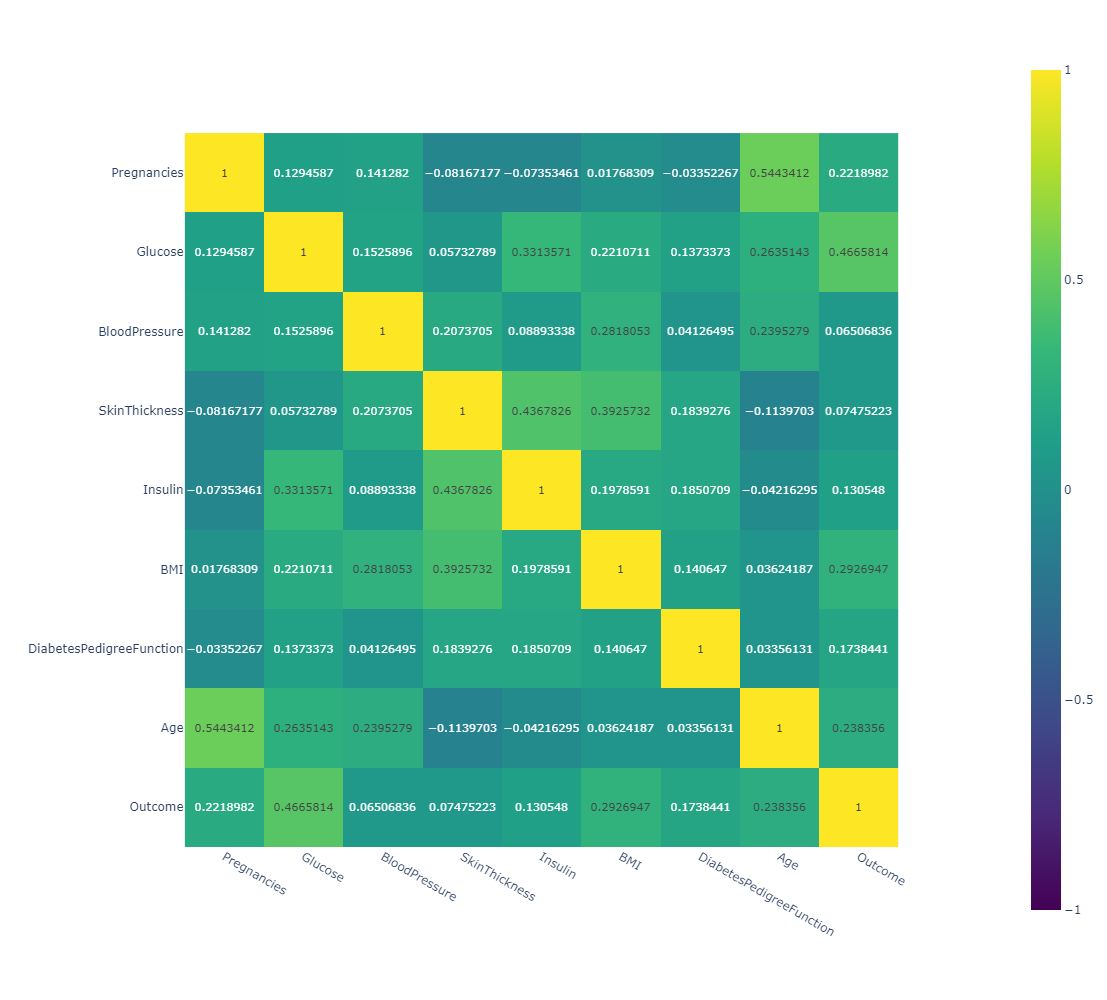

In [ ]:
fig = px.imshow(df.corr(),
                text_auto=True,
                color_continuous_scale='Viridis',
                zmin=-1, 
                zmax=1,
                width = 1300, 
                height = 1000,
               )
fig.show();

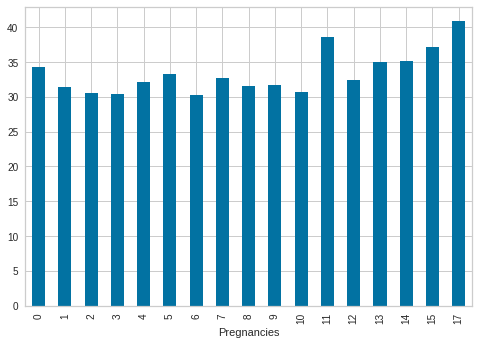

In [ ]:
df.groupby(["Pregnancies"])["BMI"].mean().plot.bar();
# Women who have had 17 pregnancies have the highest BMI.
#Women who have had 6 pregnancies have the lowest BMI.

In [ ]:
df.groupby(["Pregnancies"])["Outcome"].value_counts(normalize=True)
# The interesting that women who have 14, 15, 17 pregnancies are %100 diabete

Pregnancies  Outcome
0            0         0.65766
             1         0.34234
1            0         0.78519
             1         0.21481
2            0         0.81553
             1         0.18447
3            0         0.64000
             1         0.36000
4            0         0.66176
             1         0.33824
5            0         0.63158
             1         0.36842
6            0         0.68000
             1         0.32000
7            1         0.55556
             0         0.44444
8            1         0.57895
             0         0.42105
9            1         0.64286
             0         0.35714
10           0         0.58333
             1         0.41667
11           1         0.63636
             0         0.36364
12           0         0.55556
             1         0.44444
13           0         0.50000
             1         0.50000
14           1         1.00000
15           1         1.00000
17           1         1.00000
Name: Outcome, dty

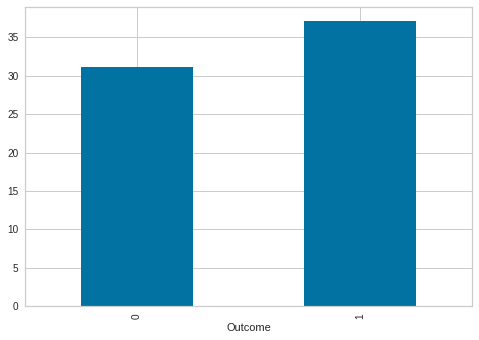

In [ ]:
df.groupby(["Outcome"])["Age"].mean().plot.bar();
# we noticed that persons' meaning of age who have diabetes are higher than persons have not diabetes

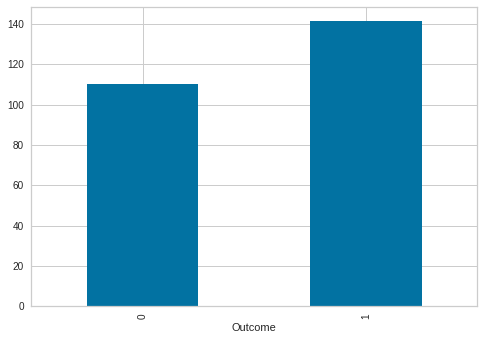

In [ ]:
df.groupby(["Outcome"])["Glucose"].mean().plot.bar();
# persons have diabetes have higher glucose than others

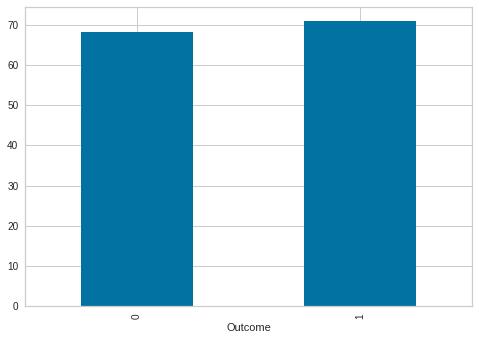

In [ ]:
df.groupby(["Outcome"])["BloodPressure"].mean().plot.bar();
# persons have diabetes have higher BloodPressure than others but values are very close to each other

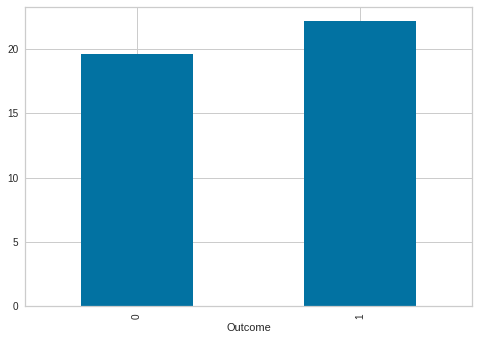

In [ ]:
df.groupby(["Outcome"])["SkinThickness"].mean().plot.bar();
# persons have diabetes have higher SkinThickness than others 

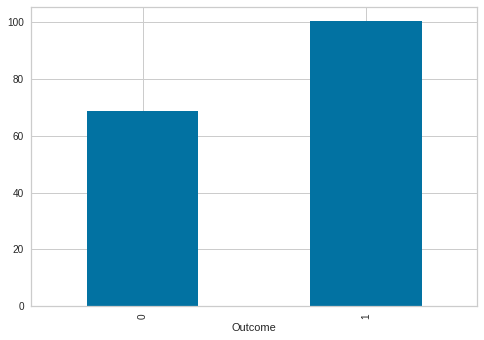

In [ ]:
df.groupby(["Outcome"])["Insulin"].mean().plot.bar();
# persons have diabetes have higher Insulin than others 

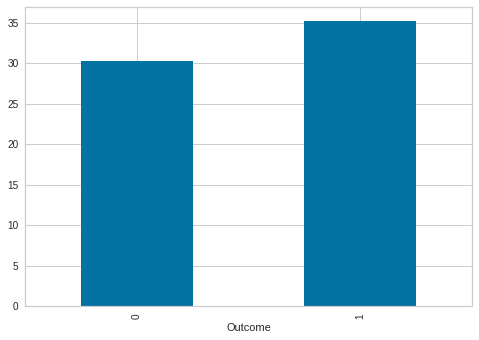

In [ ]:
df.groupby(["Outcome"])["BMI"].mean().plot.bar();
# persons have diabetes have higher BMI than others 

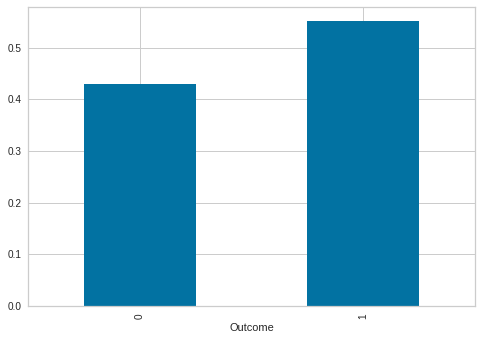

In [ ]:
df.groupby(["Outcome"])["DiabetesPedigreeFunction"].mean().plot.bar();
# persons have diabetes have higher DiabetesPedigreeFunction than others 

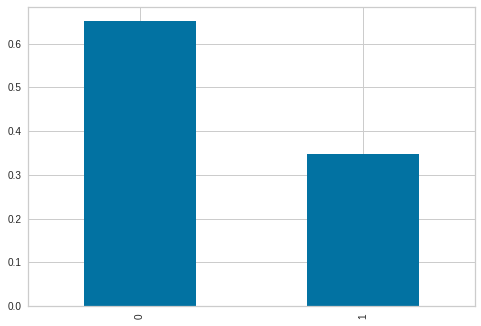

In [ ]:
df["Outcome"].value_counts(normalize=True).plot.bar();
# %65 have not diabetes
# %35 have diabetes

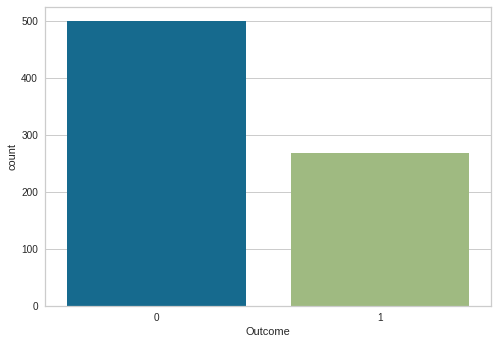

In [ ]:
sns.countplot(df.Outcome);

OUTLIER ANALYSIS

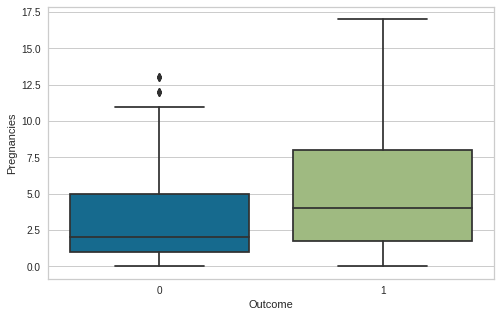

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Pregnancies", data=df);


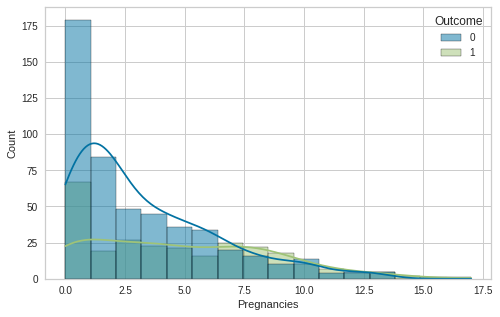

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Pregnancies",hue="Outcome",kde=True);

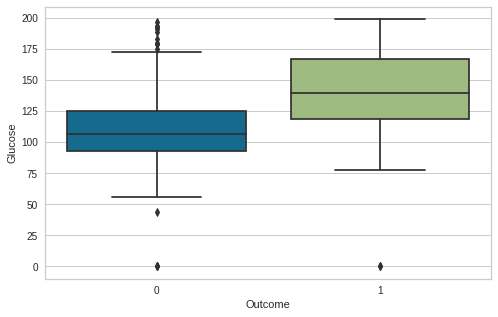

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Glucose", data=df);

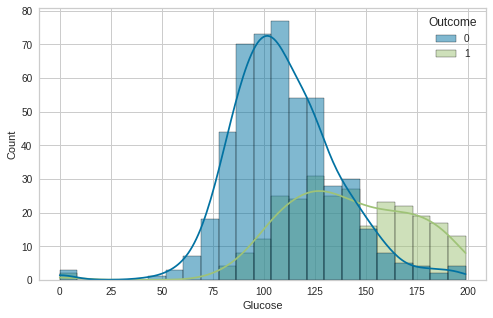

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose",hue="Outcome",kde=True);

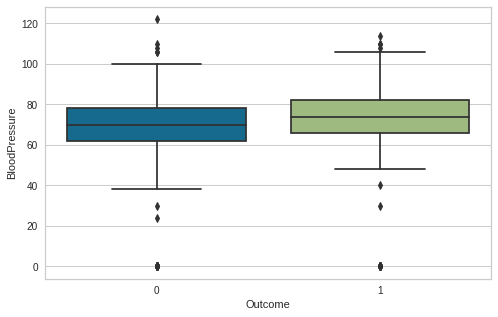

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="BloodPressure", data=df);

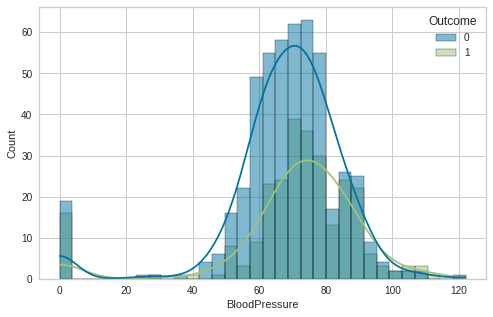

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="BloodPressure",hue="Outcome",kde=True);

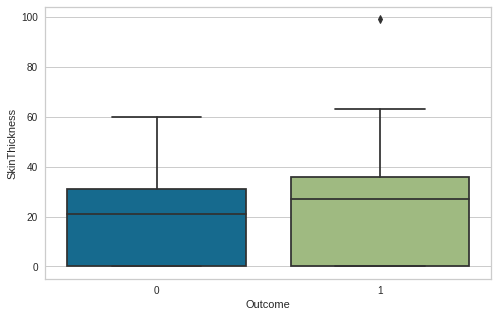

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="SkinThickness", data=df);

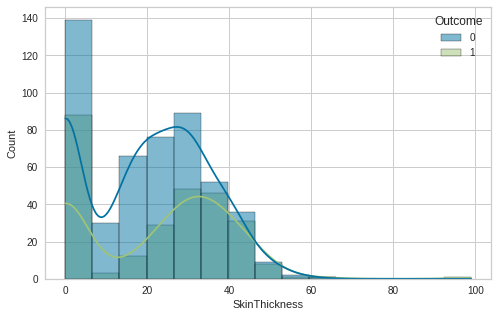

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="SkinThickness",hue="Outcome",kde=True);

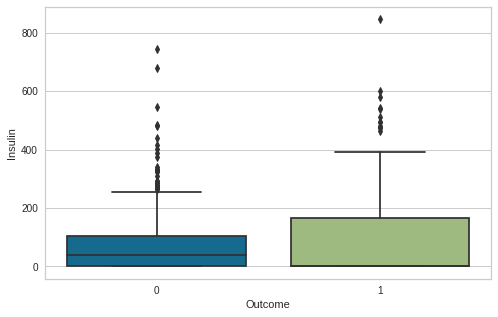

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Insulin", data=df);

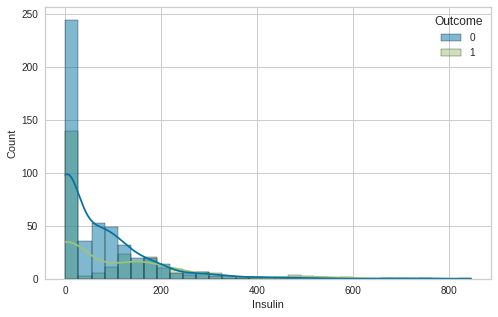

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Insulin",hue="Outcome",kde=True);

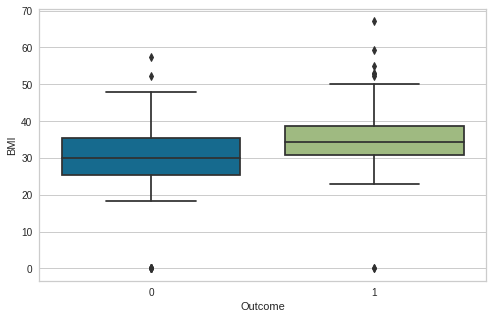

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="BMI", data=df);


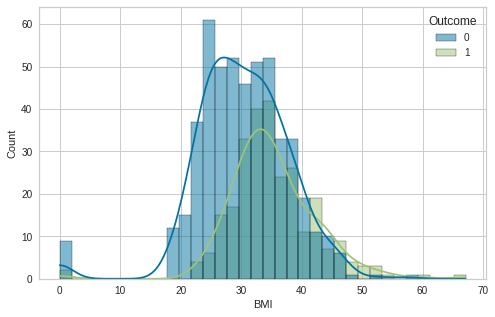

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="BMI",hue="Outcome",kde=True);

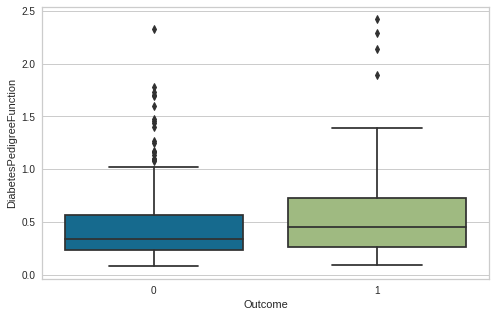

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df);

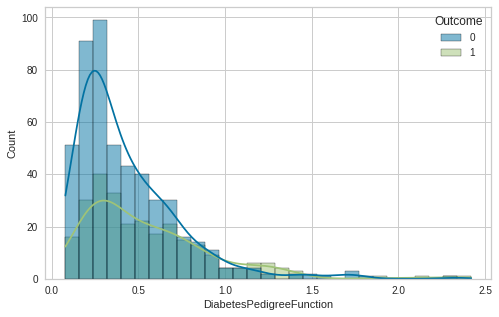

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="DiabetesPedigreeFunction",hue="Outcome",kde=True);

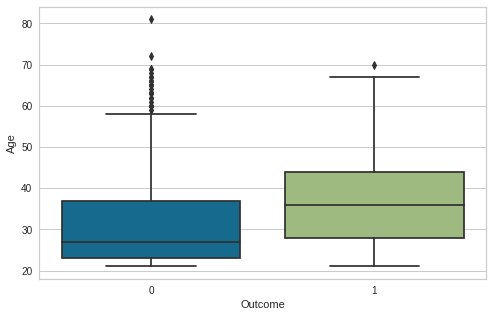

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Outcome", y="Age", data=df);

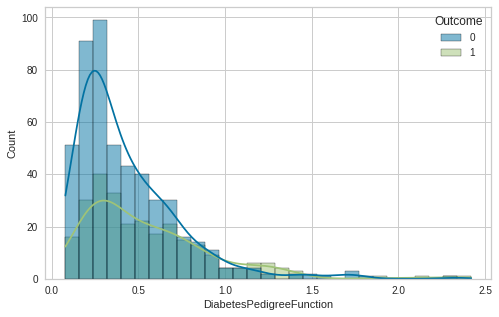

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="DiabetesPedigreeFunction",hue="Outcome",kde=True);

In [ ]:
# Logistic Rrgression algorithm is the best model with % 82 accuracy in pycaret without preprocessing 
#!pip install pycaret
from pycaret.classification import *
exp_name = setup(data = df,  target = 'Outcome')

,Description,Value
0,session_id,6261
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.77450,0.82710,0.61050,0.71860,0.65510,0.49070,0.49810,0.69600
rf,Random Forest Classifier,0.76360,0.80710,0.56920,0.72120,0.62740,0.45990,0.47290,0.50900
ridge,Ridge Classifier,0.75780,0.00000,0.59470,0.68790,0.63310,0.45500,0.46140,0.01300
gbc,Gradient Boosting Classifier,0.75410,0.81050,0.58500,0.68470,0.62090,0.44390,0.45300,0.12700
lda,Linear Discriminant Analysis,0.75410,0.82170,0.58450,0.68350,0.62480,0.44510,0.45200,0.01700
lightgbm,Light Gradient Boosting Machine,0.74860,0.79350,0.59530,0.66900,0.62160,0.43670,0.44420,0.11300
ada,Ada Boost Classifier,0.74690,0.79350,0.59050,0.66910,0.62160,0.43410,0.43970,0.11000
et,Extra Trees Classifier,0.74130,0.78700,0.52390,0.68700,0.59140,0.40780,0.41750,0.46700
knn,K Neighbors Classifier,0.71870,0.74860,0.52240,0.63770,0.56560,0.36300,0.37270,0.11400
dt,Decision Tree Classifier,0.68170,0.65690,0.56970,0.57200,0.56100,0.31350,0.32050,0.01600


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=6261, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


FEATURE ENGINEERING

#################Pregnancies#################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
88            15      136             70             32      110 37.10000                   0.15300   43        1
159           17      163             72             41      114 40.90000                   0.81700   47        1
298           14      100             78             25      184 36.60000                   0.41200   46        1
Int64Index([88, 159, 298, 455], dtype='int64')
{'Pregnancies number of outlier ': 4}





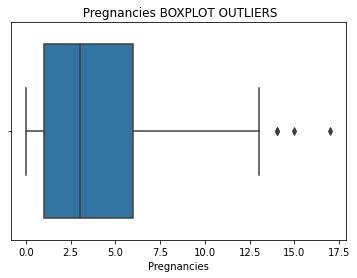

#################Glucose#################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
75             1        0             48             20        0 24.70000                   0.14000   22        0
182            1        0             74             20       23 27.70000                   0.29900   21        0
342            1        0             68             35        0 32.00000                   0.38900   22        0
Int64Index([75, 182, 342, 349, 502], dtype='int64')
{'Glucose number of outlier ': 5}





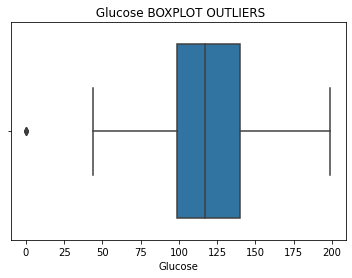

#################BloodPressure#################
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
7            10      115              0              0        0 35.30000                   0.13400   29        0
15            7      100              0              0        0 30.00000                   0.48400   32        1
18            1      103             30             38       83 43.30000                   0.18300   33        0
Int64Index([7, 15, 18, 43, 49, 60, 78, 81, 84, 106, 125, 172, 177, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 362, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 549, 589, 597, 601, 604, 619, 643, 691, 697, 703, 706], dtype='int64')
{'BloodPressure number of outlier ': 45}





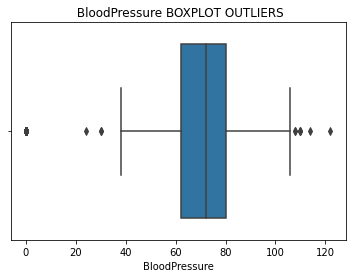

#################SkinThickness#################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
579            2      197             70             99        0 34.70000                   0.57500   62        1
Int64Index([579], dtype='int64')
{'SkinThickness number of outlier ': 1}





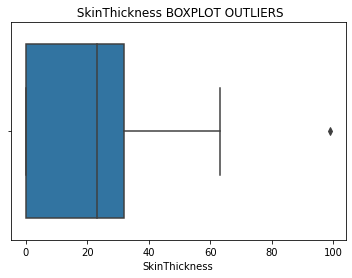

#################Insulin#################
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
8             2      197             70             45      543 30.50000                   0.15800   53        1
13            1      189             60             23      846 30.10000                   0.39800   59        1
54            7      150             66             42      342 34.70000                   0.71800   42        0
Int64Index([8, 13, 54, 111, 139, 153, 186, 220, 228, 231, 247, 248, 258, 286, 296, 360, 370, 375, 392, 409, 415, 480, 486, 519, 574, 584, 612, 645, 655, 695, 707, 710, 715, 753], dtype='int64')
{'Insulin number of outlier ': 34}





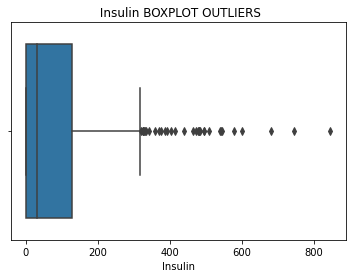

#################BMI#################
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
9             8      125             96              0        0 0.00000                   0.23200   54        1
49            7      105              0              0        0 0.00000                   0.30500   24        0
60            2       84              0              0        0 0.00000                   0.30400   21        0
Int64Index([9, 49, 60, 81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445, 494, 522, 673, 684, 706], dtype='int64')
{'BMI number of outlier ': 19}





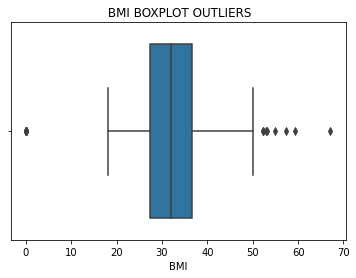

#################DiabetesPedigreeFunction#################
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
4             0      137             40             35      168 43.10000                   2.28800   33        1
12           10      139             80              0        0 27.10000                   1.44100   57        0
39            4      111             72             47      207 37.10000                   1.39000   56        1
Int64Index([4, 12, 39, 45, 58, 100, 147, 187, 218, 228, 243, 245, 259, 292, 308, 330, 370, 371, 383, 395, 445, 534, 593, 606, 618, 621, 622, 659, 661], dtype='int64')
{'DiabetesPedigreeFunction number of outlier ': 29}





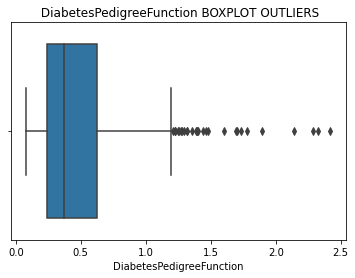

#################Age#################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin      BMI  DiabetesPedigreeFunction  Age  Outcome
123            5      132             80              0        0 26.80000                   0.18600   69        0
363            4      146             78              0        0 38.50000                   0.52000   67        1
453            2      119              0              0        0 19.60000                   0.83200   72        0
Int64Index([123, 363, 453, 459, 489, 537, 666, 674, 684], dtype='int64')
{'Age number of outlier ': 9}





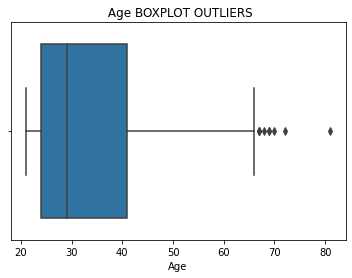

#################Outcome#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Outcome number of outlier ': 0}





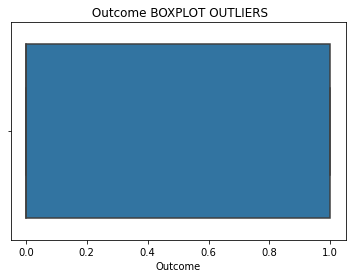

In [ ]:
def outlier_iqr(df,col_name,plot=False):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)

    iqr = q3 - q1

    low_limit = q1 - 1.5*iqr
    up_limit = q3 + 1.5*iqr
    print(f"#################{col_name}#################")
    print(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)][0:3])
    print(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)].index)
    print({f"{col_name} number of outlier ":len(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)])},end="\n\n\n\n")

    if plot:
        sns.boxplot(x=df[col_name])
        plt.title(f" {col_name} BOXPLOT OUTLIERS")
        plt.show()
    return (f"low_limit:{low_limit} , up_limit:{up_limit}")

for col in df.columns:
    outlier_iqr(df,col,plot=True)

# We suppressed outliers so they wouldn't mislead our algorithm.

In [ ]:
def outlier_df(df,col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)

    iqr = q3 - q1

    low_limit = q1 - 1.5 * iqr
    up_limit = q3 + 1.5 * iqr

    df.loc[(df[col_name]<low_limit),col_name] = low_limit
    df.loc[(df[col_name]>up_limit),col_name] = up_limit

for col in df.columns:
    outlier_df(df,col)

#################Pregnancies#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Pregnancies number of outlier ': 0}





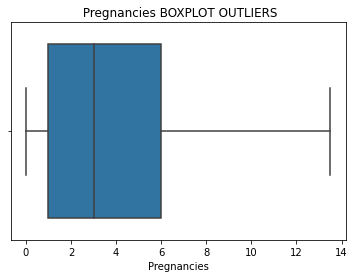

#################Glucose#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Glucose number of outlier ': 0}





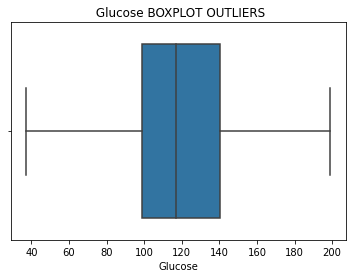

#################BloodPressure#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'BloodPressure number of outlier ': 0}





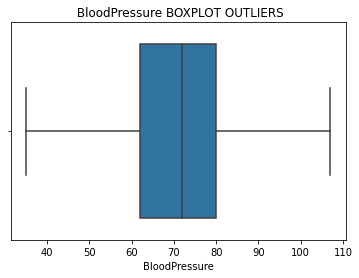

#################SkinThickness#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'SkinThickness number of outlier ': 0}





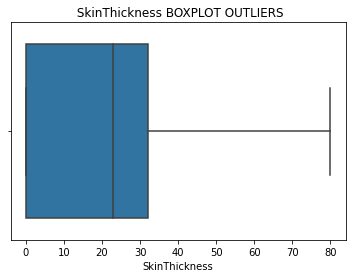

#################Insulin#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Insulin number of outlier ': 0}





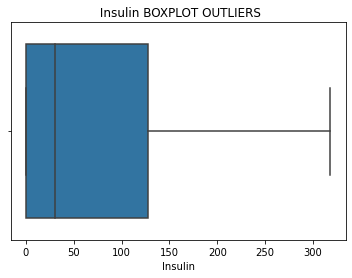

#################BMI#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'BMI number of outlier ': 0}





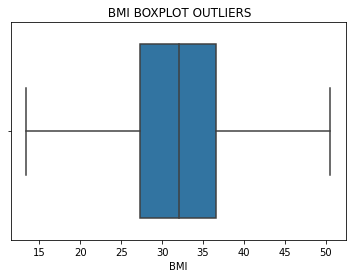

#################DiabetesPedigreeFunction#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'DiabetesPedigreeFunction number of outlier ': 0}





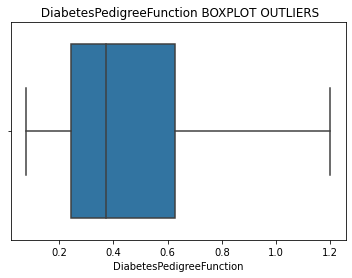

#################Age#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Age number of outlier ': 0}





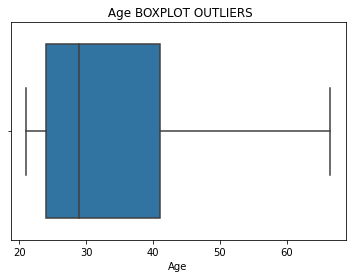

#################Outcome#################
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []
Int64Index([], dtype='int64')
{'Outcome number of outlier ': 0}





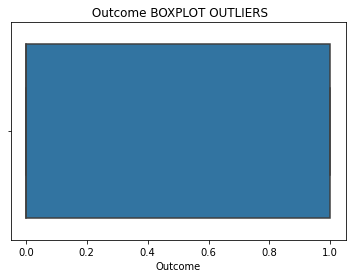

In [ ]:
def outlier_iqr(df,col_name,plot=False):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)

    iqr = q3 - q1

    low_limit = q1 - 1.5*iqr
    up_limit = q3 + 1.5*iqr
    print(f"#################{col_name}#################")
    print(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)][0:3])
    print(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)].index)
    print({f"{col_name} number of outlier ":len(df[(df[col_name]<low_limit) | (df[col_name]>up_limit)])},end="\n\n\n\n")

    if plot:
        sns.boxplot(x=df[col_name])
        plt.title(f" {col_name} BOXPLOT OUTLIERS")
        plt.show()
    return (f"low_limit:{low_limit} , up_limit:{up_limit}")

for col in df.columns:
    outlier_iqr(df,col,plot=True)

**We checked to see if there is any missing value.**

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Since Glucose, Insulin, Blood Pressure, Skin Thickness and BMI cannot be 0, we replaced the 0 values with np.NaN.**


In [ ]:
df["Glucose"].replace(0, np.nan, inplace=True)
df["BloodPressure"].replace(0, np.nan, inplace=True)
df["SkinThickness"].replace(0, np.nan, inplace=True)
df["Insulin"].replace(0, np.nan, inplace=True)
df["BMI"].replace(0, np.nan, inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df["SkinThickness"].mean()

29.11829944547135

In [ ]:
df.groupby(["Age","Outcome"])["SkinThickness"].mean()

Age       Outcome
21.00000  0.00000   22.85106
          1.00000   36.25000
22.00000  0.00000   23.20755
          1.00000   35.00000
23.00000  0.00000   26.50000
                      ...   
65.00000  0.00000   37.00000
66.00000  0.00000        NaN
          1.00000        NaN
66.50000  0.00000   33.00000
          1.00000   18.00000
Name: SkinThickness, Length: 91, dtype: float64

In [ ]:
df.groupby(["Age","Outcome"])["SkinThickness"].transform("mean")

0     28.33333
1     29.50000
2     30.80000
3     22.85106
4     27.57143
        ...   
763   31.33333
764   28.80000
765   28.80000
766   32.00000
767   26.50000
Name: SkinThickness, Length: 768, dtype: float64

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.00000,148.00000,72,35.00000,NaN,33.60000,0.62700,50.00000,1.00000
1,1.00000,85.00000,66,29.00000,NaN,26.60000,0.35100,31.00000,0.00000
2,8.00000,183.00000,64,NaN,NaN,23.30000,0.67200,32.00000,1.00000
3,1.00000,89.00000,66,23.00000,94.00000,28.10000,0.16700,21.00000,0.00000
4,0.00000,137.00000,40,35.00000,168.00000,43.10000,1.20000,33.00000,1.00000


In [ ]:
df["SkinThickness"] = df["SkinThickness"].fillna(df.groupby(["Age","Outcome"])["SkinThickness"].transform("mean"))


In [ ]:
df["Insulin"].mean()

143.56662436548223

In [ ]:
df["Insulin"].median()

125.0

In [ ]:
df.groupby(["Age","Outcome"])["Insulin"].median()

Age       Outcome
21.00000  0.00000    87.00000
          1.00000   242.56250
22.00000  0.00000    88.00000
          1.00000   185.00000
23.00000  0.00000   100.00000
                       ...   
65.00000  0.00000         NaN
66.00000  0.00000         NaN
          1.00000         NaN
66.50000  0.00000    60.00000
          1.00000         NaN
Name: Insulin, Length: 91, dtype: float64

In [ ]:
df.groupby(["Age","Outcome"])["Insulin"].mean()

Age       Outcome
21.00000  0.00000   113.18939
          1.00000   242.56250
22.00000  0.00000   109.76645
          1.00000   203.82500
23.00000  0.00000   144.65500
                       ...   
65.00000  0.00000         NaN
66.00000  0.00000         NaN
          1.00000         NaN
66.50000  0.00000    60.00000
          1.00000         NaN
Name: Insulin, Length: 91, dtype: float64

In [ ]:
df.groupby(["Age","Outcome"])["Insulin"].transform("median")

0     144.00000
1     140.00000
2      96.00000
3      87.00000
4     168.00000
         ...   
763   180.00000
764   125.00000
765   112.00000
766   123.00000
767   100.00000
Name: Insulin, Length: 768, dtype: float64

In [ ]:
df.groupby(["Age","Outcome"])["Insulin"].transform("mean")

0     144.00000
1     181.82500
2     114.00000
3     113.18939
4     150.00000
         ...   
763   180.00000
764   151.27273
765   146.87500
766   123.00000
767   144.65500
Name: Insulin, Length: 768, dtype: float64

In [ ]:
## We will choose median because we saw that median values are values close to real values
df["Insulin"] = df["Insulin"].fillna(df.groupby(["Age","Outcome"])["Insulin"].transform("median"))

In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               13
Insulin                     27
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [ ]:
## We assigned the median values for the rest missing values
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].median())
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].median())

In [ ]:
df.isnull().sum().any()

False

## CREATING NEW FEATURES

In [ ]:
# AGE
df["Age_Group"] = pd.cut(df["Age"], 5, labels= [1,2,3,4,5])
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group
0,6.00000,148.00000,72,35.00000,144.00000,33.60000,0.62700,50.00000,1.00000,4
1,1.00000,85.00000,66,29.00000,140.00000,26.60000,0.35100,31.00000,0.00000,2
2,8.00000,183.00000,64,30.80000,96.00000,23.30000,0.67200,32.00000,1.00000,2
3,1.00000,89.00000,66,23.00000,94.00000,28.10000,0.16700,21.00000,0.00000,1
4,0.00000,137.00000,40,35.00000,168.00000,43.10000,1.20000,33.00000,1.00000,2


In [ ]:
# BMI -------> OBESE CATEGORIES------> {Underweight, Normal Weight, Overweight,  Obese}


df.loc[(df['BMI'] < 18.5), 'BMI_Group'] = 'Underweight'
df.loc[((df['BMI'] >= 18.5) & (df['BMI'] < 25)), 'BMI_Group'] = 'Normal'
df.loc[((df['BMI'] >= 25) & (df['BMI'] < 30)), 'BMI_Group'] = 'Overweight'
df.loc[(df['BMI'] >= 30), 'BMI_Group'] = 'Obese'


df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,BMI_Group
0,6.00000,148.00000,72,35.00000,144.00000,33.60000,0.62700,50.00000,1.00000,4,Obese
1,1.00000,85.00000,66,29.00000,140.00000,26.60000,0.35100,31.00000,0.00000,2,Overweight
2,8.00000,183.00000,64,30.80000,96.00000,23.30000,0.67200,32.00000,1.00000,2,Normal


In [ ]:
df["Glucose"].value_counts()

99.00000     17
100.00000    17
111.00000    14
129.00000    14
125.00000    14
             ..
191.00000     1
177.00000     1
44.00000      1
62.00000      1
190.00000     1
Name: Glucose, Length: 136, dtype: int64

In [ ]:
 df[["Glucose"]].agg(["max","min"])


,Glucose
max,199.00000
min,37.12500


GLUCOSE-----> 16--140---->normal 

others abnormal


In [ ]:
def glucose_df(df, col_name="Glucose"):
  if 16 < df[col_name] <140:
    return "normal"
  else:
    return "abnormal"
df["Glucose_group"] = df.apply(glucose_df,axis=1)
df["Glucose_group"].head()

0    abnormal
1      normal
2    abnormal
3      normal
4      normal
Name: Glucose_group, dtype: object

In [ ]:
## insulin level
df[["Insulin"]].agg(["max","min"])

,Insulin
max,318.12500
min,14.00000


In [ ]:
def insulin_df(df):

  if df["Insulin"] <= 100:
    return "normal"
  elif df["Insulin"] > 100 and df["Insulin"] <= 126:
    return "prediabetes"
  else:
    return "diabetes"

df["Insulin_group"] = df.apply(insulin_df,axis=1)
df["Insulin_group"].head()


0    diabetes
1    diabetes
2      normal
3      normal
4    diabetes
Name: Insulin_group, dtype: object

In [ ]:
# BloodPressure LEVEL
def BloodPressure_df(df):
  if df["BloodPressure"] <= 79:
    return "normal"
  elif df["BloodPressure"] <= 89:
    return "prehypertension"
  else:
    return "hypertension"

df["BloodPressure_group"] = df.apply(BloodPressure_df, axis=1)
df["BloodPressure_group"].head(3)

0    normal
1    normal
2    normal
Name: BloodPressure_group, dtype: object

LABEL ENCODING

In [ ]:
le = LabelEncoder()
le.fit_transform(df["Outcome"])[0:5]
df["Outcome"].head(15)


0    1.00000
1    0.00000
2    1.00000
3    0.00000
4    1.00000
5    0.00000
6    1.00000
7    0.00000
8    1.00000
9    1.00000
10   0.00000
11   1.00000
12   0.00000
13   1.00000
14   1.00000
Name: Outcome, dtype: float64

In [ ]:
le.inverse_transform([0,1])

array([0., 1.])

In [ ]:
# Label encoding for  GLUCOSE_group

In [ ]:
df["Glucose_group"] = le.fit_transform(df["Glucose_group"])
df["Glucose_group"].head(3)

0    0
1    1
2    0
Name: Glucose_group, dtype: int64

In [ ]:
## After applying label encoding binary categorical features, we will one hot encoding for features have multiple categorical values


In [ ]:
# One-Hot Encoding

def one_hot_encoder(df,ohe_cols, drop_first=True):
  df = pd.get_dummies(df, columns=ohe_cols, drop_first=drop_first)
  return df

In [ ]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df,ohe_cols, drop_first=True)
ohe_cols

['Age_Group', 'BMI_Group', 'Insulin_group', 'BloodPressure_group']

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "0"]
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Glucose_group',
 'Age_Group_2',
 'Age_Group_3',
 'Age_Group_4',
 'Age_Group_5',
 'BMI_Group_Obese',
 'BMI_Group_Overweight',
 'BMI_Group_Underweight',
 'Insulin_group_normal',
 'Insulin_group_prediabetes',
 'BloodPressure_group_normal',
 'BloodPressure_group_prehypertension']

In [ ]:
## Standardization of numeric values

rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])



In [ ]:
df.to_pickle("diabetes_.pkl")

In [4]:
df = pd.read_pickle("/content/diabetes_.pkl")

CREATE THE MODEL

In [ ]:
# firstly we will create the model by dropping only outcome feature
# Logistic Regression was the best algorithm with pycaret but for now, the best model is Random Forest Classifier



In [5]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [6]:
lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)
lr_pred = lr_model.predict(X_text)
accuracy_score(lr_pred, y_test)

0.7835497835497836

In [7]:
#the best model is RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
rf_pred = rf_model.predict(X_text)
accuracy_score(rf_pred, y_test)

0.8225108225108225

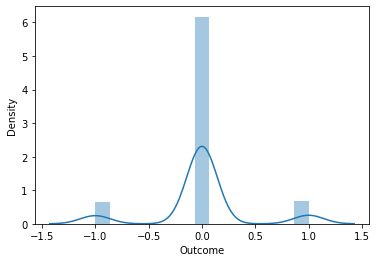

In [8]:
sns.distplot(rf_pred-y_test);

In [9]:
# we will drop Outcome",'BMI','Insulin','Glucose','BloodPressure','Age' features
df = pd.read_pickle("/content/diabetes_.pkl")

In [10]:
y = df["Outcome"]
X = df.drop(["Outcome",'BMI','Insulin','Glucose','BloodPressure','Age'], axis=1)
X_train, X_text, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [11]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_text)
accuracy_score(y_pred, y_test)


0.7748917748917749

In [12]:
lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)
lr_pred = lr_model.predict(X_text)
accuracy_score(lr_pred, y_test)

0.7619047619047619

## I got more accurate values without dropping BMI,Insulin,Glucose,BloodPressure,Age columns

In [13]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [15]:
#the best model is RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_score(rf_pred, y_test)

0.8225108225108225

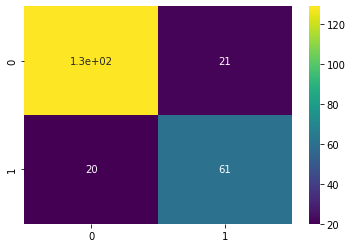

In [16]:
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,cmap='viridis');

In [17]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86       150
         1.0       0.74      0.75      0.75        81

    accuracy                           0.82       231
   macro avg       0.80      0.81      0.81       231
weighted avg       0.82      0.82      0.82       231



In [19]:
lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
accuracy_score(lr_pred, y_test)

0.7835497835497836

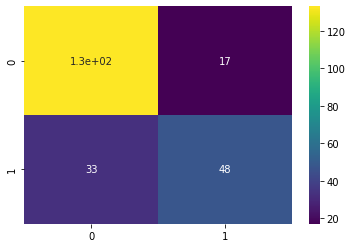

In [20]:
cm = confusion_matrix(y_test,lr_pred)
sns.heatmap(cm, annot=True, cmap='viridis');

In [21]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       150
         1.0       0.74      0.59      0.66        81

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [ ]:
## CROSS VALIDATION 
## Cross Validation allowed us to see if the high performance of the model was random. So we understood that 
  # the model did not show any bias.
## Cross Validation has shown that our model is not overfitting and that our model is of good quality.

In [22]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(rf_model,X_train,y_train,cv=kf)
print("\nRandom Forest Classification ")
print(f"Cross Validation Score: {score}")
print(f"Mean Cross Validation score :{score.mean()}")

score=cross_val_score(lr_model,X_train,y_train,cv=kf)
print("\nLogistic Regression ")
print(f"Cross Validation Score: {score}")
print(f"Mean Cross Validation score :{score.mean()}")



Random Forest Classification 
Cross Validation Score: [0.81481481 0.78703704 0.8317757  0.8411215  0.85046729]
Mean Cross Validation score :0.8250432675666322

Logistic Regression 
Cross Validation Score: [0.77777778 0.75       0.79439252 0.82242991 0.78504673]
Mean Cross Validation score :0.7859293873312565


GRIDSEARCHCV HYPERPARAMETER TUNING

In [30]:
#Creating Parameters
params = {
    'criterion':['gini','entropy'],
    'n_estimators':[20,50,75,100],
    'max_features':['auto','sqrt','log2'],
    'class_weight':['balanced','balanced_subsample']}

In [31]:
#Fitting the model
rf = RandomForestClassifier()
grid = GridSearchCV(rf, params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 75}
Accuracy:0.82421875


              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       150
         1.0       0.79      0.69      0.74        81

    accuracy                           0.83       231
   macro avg       0.82      0.80      0.80       231
weighted avg       0.82      0.83      0.82       231



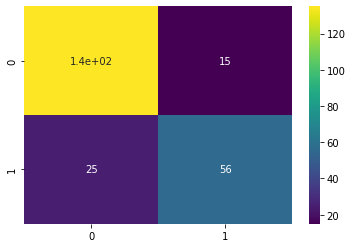

In [33]:
final_model = RandomForestClassifier(n_estimators=75,class_weight='balanced_subsample',
                                     criterion='gini',max_features='sqrt')

final_model.fit(X_train,y_train)

rf_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
print(classification_report(y_test,rf_pred))


As a result, when we use the best paradigms in our model, the accuracy of our model is 83%.

In [35]:
# we can see predicted X_test values
final_model.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

DEEP LEARNING

In [ ]:
## we will see difference between deep learning and machine learning

In [ ]:
#!pip install --user tensorflow
#!pip install --user keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_pickle("/content/diabetes_.pkl")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [ ]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(X,y,epochs=150,batch_size=10,verbose=1 )

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 0.6669 - accuracy: 0.5964
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.6836
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.7448
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4937 - accuracy: 0.7630
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7799
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7969
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7969
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7995
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8034
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4202 - accuracy: 0.8099
Epoch 11/

In [ ]:
## our success rate is 92% and the error rate is 23%.
model.summary()
scores=model.evaluate(X,y)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                252       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________
24/24 [==============================] - 0s 1ms/step - loss: 0.2261 - accuracy: 0.9193


In [ ]:
 ## I want to see how our success rate changes when the epochs change the next time 
  # we trained the model by changing the values.
  # ACCURACY is 95.77%
 history=model.fit(X,y,validation_split=0.20,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
62/62 - 0s - loss: 0.2394 - accuracy: 0.9137 - val_loss: 0.1977 - val_accuracy: 0.9416 - 311ms/epoch - 5ms/step
Epoch 2/200
62/62 - 0s - loss: 0.2368 - accuracy: 0.9104 - val_loss: 0.2012 - val_accuracy: 0.9351 - 129ms/epoch - 2ms/step
Epoch 3/200
62/62 - 0s - loss: 0.2358 - accuracy: 0.9137 - val_loss: 0.2073 - val_accuracy: 0.9286 - 173ms/epoch - 3ms/step
Epoch 4/200
62/62 - 0s - loss: 0.2336 - accuracy: 0.9137 - val_loss: 0.2124 - val_accuracy: 0.9286 - 134ms/epoch - 2ms/step
Epoch 5/200
62/62 - 0s - loss: 0.2319 - accuracy: 0.9121 - val_loss: 0.2164 - val_accuracy: 0.9221 - 138ms/epoch - 2ms/step
Epoch 6/200
62/62 - 0s - loss: 0.2324 - accuracy: 0.9153 - val_loss: 0.2189 - val_accuracy: 0.9221 - 169ms/epoch - 3ms/step
Epoch 7/200
62/62 - 0s - loss: 0.2309 - accuracy: 0.9153 - val_loss: 0.2234 - val_accuracy: 0.9286 - 130ms/epoch - 2ms/step
Epoch 8/200
62/62 - 0s - loss: 0.2293 - accuracy: 0.9153 - val_loss: 0.2246 - val_accuracy: 0.9286 - 167ms/epoch - 3ms/step
Epoch 9/


           
  
-----> Machine Learning accuracy rate--> 83%

-----> Deep Learning accuracy rate-----> 95.77%